# Long Short Term Memory Network (LSTM)

## Stock Price Prediction

Reference: https://medium.com/the-handbook-of-coding-in-finance/stock-prices-prediction-using-long-short-term-memory-lstm-model-in-python-734dd1ed6827

In [1]:
# Import dependencies

import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Read the dataset into a pandas dataframe
df1 = pd.read_csv('../../launchit.csv')
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,TCKR,sector,industry,country,growth_rate,target_median_price,target_mean_price,target_high_price
0,2019-12-19,11.000,11.96,10.50,10.70,10.70,89400.0,INDO,Energy,Oil & Gas E&P,Indonesia,1.206,15.0,15.0,15.0
1,2019-12-20,10.808,12.49,9.25,9.65,9.65,503000.0,INDO,Energy,Oil & Gas E&P,Indonesia,1.206,15.0,15.0,15.0
2,2019-12-23,8.790,8.79,7.25,7.81,7.81,117400.0,INDO,Energy,Oil & Gas E&P,Indonesia,1.206,15.0,15.0,15.0
3,2019-12-24,7.500,7.64,6.00,6.41,6.41,102800.0,INDO,Energy,Oil & Gas E&P,Indonesia,1.206,15.0,15.0,15.0
4,2019-12-26,6.420,7.72,6.42,7.41,7.41,78400.0,INDO,Energy,Oil & Gas E&P,Indonesia,1.206,15.0,15.0,15.0


In [6]:
# Make a new copy of the dataset_train 
stock_data = df1.copy()

In [7]:
# Drop qualitative columns
stock_data = stock_data.drop(labels=['sector', 'industry', 'country', 'growth_rate', 'target_median_price', 'target_mean_price', 'target_high_price'], axis=1)
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,TCKR
0,2019-12-19,11.000,11.96,10.50,10.70,10.70,89400.0,INDO
1,2019-12-20,10.808,12.49,9.25,9.65,9.65,503000.0,INDO
2,2019-12-23,8.790,8.79,7.25,7.81,7.81,117400.0,INDO
3,2019-12-24,7.500,7.64,6.00,6.41,6.41,102800.0,INDO
4,2019-12-26,6.420,7.72,6.42,7.41,7.41,78400.0,INDO


In [8]:
# Isolate just 1 TCKR to attempt LSTM process
stock_data = stock_data[stock_data.TCKR == 'INDO']
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,TCKR
0,2019-12-19,11.000,11.96,10.500,10.70,10.70,89400.0,INDO
1,2019-12-20,10.808,12.49,9.250,9.65,9.65,503000.0,INDO
2,2019-12-23,8.790,8.79,7.250,7.81,7.81,117400.0,INDO
3,2019-12-24,7.500,7.64,6.000,6.41,6.41,102800.0,INDO
4,2019-12-26,6.420,7.72,6.420,7.41,7.41,78400.0,INDO
...,...,...,...,...,...,...,...,...
721,2022-10-31,6.370,6.72,6.340,6.67,6.67,319600.0,INDO
722,2022-11-01,6.900,7.05,6.660,6.75,6.75,374500.0,INDO
723,2022-11-02,6.720,6.88,6.410,6.61,6.61,605100.0,INDO
724,2022-11-03,6.560,6.82,6.542,6.70,6.70,177700.0,INDO


Text(0, 0.5, 'Prices ($)')

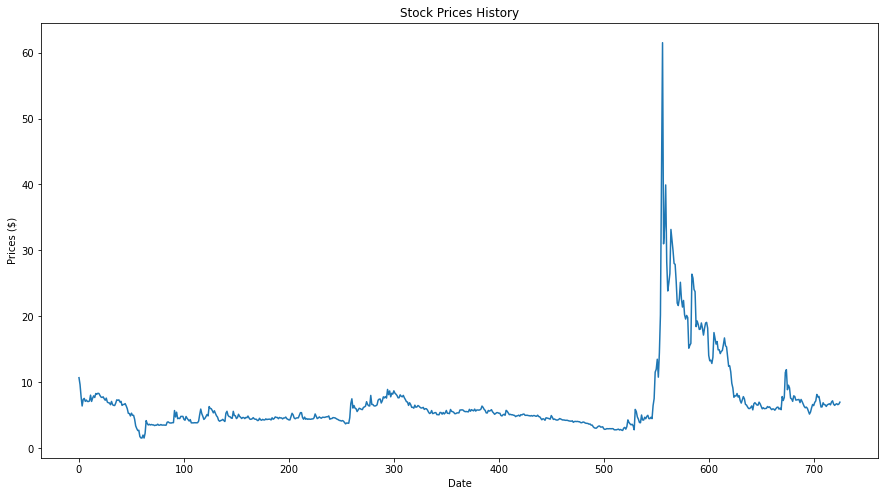

In [9]:
# Visualize stock prices history
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [10]:
# Prepare the training set
close_prices = stock_data['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [12]:
# Prepare the test set

test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [13]:
# Setting up the LSTM Network Architecture
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Train the LSTM Model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
521/521 [==============================] - 32s 46ms/step - loss: 0.0039
Epoch 2/3
521/521 [==============================] - 24s 46ms/step - loss: 0.0025
Epoch 3/3
521/521 [==============================] - 21s 40ms/step - loss: 0.0024


In [15]:
# Evaluate the Model
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

5/5 [==============================] - 3s 44ms/step


0.5175598966664281

C:\Users\Owner\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


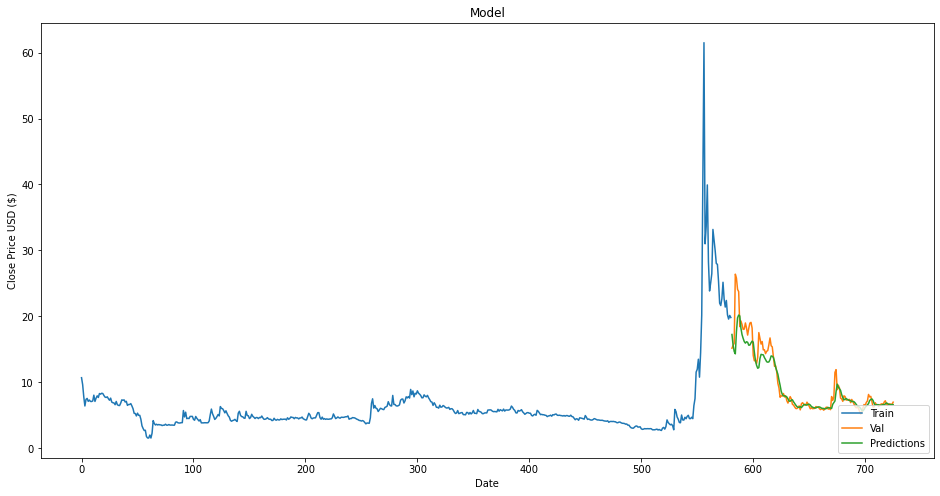

In [16]:
# Visualize the Predicted Prices
data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()